Importing the necessary libraries, in this homework I have used only numpy and matplotlib. Numpy to make mathematical operations and more on the other hand matplotlib is for plotting operations.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Loading the data using numpy in the form of numpy array.

In [5]:
training_df = np.genfromtxt('optdigits.tra', delimiter=",")     #loading the data using numpy to use it as numpy array
X_training = training_df[:, 0:63]
y_training = training_df[:, 64]

testing_df = np.genfromtxt('optdigits.tes', delimiter=",")
X_testing = testing_df[:, 0:63]
y_testing = testing_df[:, 64]

The sigmoid and derivative_sigmoid functions define the sigmoid activation function and its derivative, respectively. These functions will be used in the neural network to introduce nonlinearity.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

The size of the training data is determined, and several variables are initialized, including the weights and biases of the neural network. The weights and biases are initialized randomly.

In [7]:
size = training_df.shape

#Numvber of inputs
train = size[0]                
#column count
C = size[1]
#last column is not a featyre , it's the label
number_of_features = C - 1
#learning rate
laerning_rate = 0.99
weight_decay = 1

#implementation specific variables to use 

first_hidden_layer = 2
second_hidden_layer = 64
class_count = 10
# weights are initalized as randoms

weight_1 = -0.01 + 0.02 * np.random.rand(first_hidden_layer, number_of_features)
weight_2 = -0.01 + 0.02 * np.random.rand(second_hidden_layer, first_hidden_layer)
weight_3 = -0.01 + 0.02 * np.random.rand(class_count, second_hidden_layer)

#biases are initalized as randoms

bias_1 = -0.01 + 0.02 * np.random.rand(first_hidden_layer, 1)
bias_2 = -0.01 + 0.02 * np.random.rand(second_hidden_layer, 1)
bias_3 = -0.01 + 0.02 * np.random.rand(class_count, 1)

#created an identity matrix in size 10x10

classes = np.eye(10, 10)

r = training_df[:, 64] 


dw3 = np.zeros([class_count, second_hidden_layer])
dw2 = np.zeros([second_hidden_layer, first_hidden_layer])
dw1 = np.zeros([first_hidden_layer, number_of_features])

db3 = np.zeros([class_count, 1])
db2 = np.zeros([second_hidden_layer, 1])
db1 = np.zeros([first_hidden_layer, 1])

The main loop then iterates over each training example. For each training example, the input data is passed through the neural network, and the output is computed. The error between the predicted output and the true label is then computed and used to update the weights and biases of the neural network using backpropagation. This process is repeated for all training examples, and the loop is repeated for a specified number of epochs.

In [12]:
for i in range(1):
    for new_input in range(train):
        x = np.transpose(np.array([training_df[new_input, :64]]))
        a_1 = x

        z_2 = weight_1 @ a_1 + bias_1       #input values of first hidden layer
        print("Z_2 ", z_2)
        a_2 = sigmoid(z_2)                  #sigmoid for first hidden outputs
        z_3 = weight_2 @ a_2 + bias_2
        a_3 = sigmoid(z_3)
        z_4 = weight_3 @ a_3 + bias_3       #output layer outputs
        a_4 = sigmoid(z_4)                  #sigmoid for output layer outputs

        y = np.array([classes[:, int(r[new_input])]]).T         #back propagation
        
        d_4 = -(y - a_4) * derivative_sigmoid(z_4)
        d_3 = (np.transpose(weight_3) @ d_4) * derivative_sigmoid(z_3)
        d_2 = (np.transpose(weight_2) @ d_3) * derivative_sigmoid(z_2)

        pdw3 = d_4 @ np.transpose(a_3)
        pdw2 = d_3 @ np.transpose(a_2)
        pdw1 = d_2 @ np.transpose(a_1)

        pdb3 = d_4
        pdb2 = d_3
        pdb1 = d_2

        dw3 += pdw3
        dw2 += pdw2
        dw1 += pdw1

        db3 += pdb3
        db2 += pdb2
        db1 += pdb1

        weight_3 -= (laerning_rate * (dw3 / train)) + weight_decay * weight_3
        weight_2 -= (laerning_rate * (dw2 / train)) + weight_decay * weight_2
        weight_1 -= (laerning_rate * (dw1 / train)) + weight_decay * weight_1

        bias_3 -= (laerning_rate * (db3 / train))
        bias_2 -= (laerning_rate * (db2 / train))
        bias_1 -= (laerning_rate * (db1 / train))


Z_2  [[ 0.00023835]
 [-0.00432019]]
Z_2  [[ 0.00023828]
 [-0.00431935]]
Z_2  [[ 0.00024085]
 [-0.00432056]]
Z_2  [[ 0.00024102]
 [-0.00432095]]
Z_2  [[ 0.00023961]
 [-0.0043215 ]]
Z_2  [[ 0.00024049]
 [-0.00431951]]
Z_2  [[ 0.00024016]
 [-0.00432129]]
Z_2  [[ 0.00024019]
 [-0.00432102]]
Z_2  [[ 0.00023906]
 [-0.00431965]]
Z_2  [[ 0.00024013]
 [-0.00431904]]
Z_2  [[ 0.00024103]
 [-0.00432119]]
Z_2  [[ 0.00024176]
 [-0.00432053]]
Z_2  [[ 0.00024088]
 [-0.00432008]]
Z_2  [[ 0.00024008]
 [-0.00432031]]
Z_2  [[ 0.00024044]
 [-0.00432006]]
Z_2  [[ 0.00023845]
 [-0.00431986]]
Z_2  [[ 0.00024089]
 [-0.00432164]]
Z_2  [[ 0.00024139]
 [-0.00432163]]
Z_2  [[ 0.00023988]
 [-0.00432   ]]
Z_2  [[ 0.00024095]
 [-0.00431988]]
Z_2  [[ 0.00024119]
 [-0.00432105]]
Z_2  [[ 0.0002398 ]
 [-0.00431973]]
Z_2  [[ 0.00023996]
 [-0.00432135]]
Z_2  [[ 0.00024044]
 [-0.00432122]]
Z_2  [[ 0.00024142]
 [-0.00432092]]
Z_2  [[ 0.0002411 ]
 [-0.00432052]]
Z_2  [[ 0.00023876]
 [-0.00432046]]
Z_2  [[ 0.00023999]
 [-0.004

/tmp/ipykernel_19721/1590903802.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Z_2  [[ 0.00023937]
 [-0.00431584]]
Z_2  [[ 0.00024024]
 [-0.00431712]]
Z_2  [[ 0.00024092]
 [-0.00431747]]
Z_2  [[ 0.00024013]
 [-0.00431713]]
Z_2  [[ 0.00023961]
 [-0.00431661]]
Z_2  [[ 0.00023885]
 [-0.00431657]]
Z_2  [[ 0.00024012]
 [-0.00431599]]
Z_2  [[ 0.00024091]
 [-0.00431808]]
Z_2  [[ 0.00024086]
 [-0.00431553]]
Z_2  [[ 0.00024077]
 [-0.0043172 ]]
Z_2  [[ 0.00024077]
 [-0.00431508]]
Z_2  [[ 0.00024093]
 [-0.00431779]]
Z_2  [[ 0.00023875]
 [-0.00431544]]
Z_2  [[ 0.00024106]
 [-0.00431665]]
Z_2  [[ 0.00024043]
 [-0.00431706]]
Z_2  [[ 0.00024104]
 [-0.00431771]]
Z_2  [[ 0.00024032]
 [-0.0043163 ]]
Z_2  [[ 0.00023852]
 [-0.00431546]]
Z_2  [[ 0.00023884]
 [-0.0043154 ]]
Z_2  [[ 0.00024046]
 [-0.00431714]]
Z_2  [[ 0.00023991]
 [-0.00431634]]
Z_2  [[ 0.00024067]
 [-0.00431788]]
Z_2  [[ 0.00024089]
 [-0.00431762]]
Z_2  [[ 0.00024099]
 [-0.00431827]]
Z_2  [[ 0.00024126]
 [-0.00431802]]
Z_2  [[ 0.00023981]
 [-0.00431611]]
Z_2  [[ 0.00024052]
 [-0.0043174 ]]
Z_2  [[ 0.00024158]
 [-0.004

Z_2  [[ 0.0002404 ]
 [-0.00431368]]
Z_2  [[ 0.0002403 ]
 [-0.00431434]]
Z_2  [[ 0.00024076]
 [-0.00431407]]
Z_2  [[ 0.00023908]
 [-0.00431402]]
Z_2  [[ 0.00023899]
 [-0.00431447]]
Z_2  [[ 0.00023994]
 [-0.00431143]]
Z_2  [[ 0.00024018]
 [-0.00431185]]
Z_2  [[ 0.00024049]
 [-0.0043134 ]]
Z_2  [[ 0.00024033]
 [-0.00431497]]
Z_2  [[ 0.00023929]
 [-0.00431319]]
Z_2  [[ 0.00023946]
 [-0.0043146 ]]
Z_2  [[ 0.00023912]
 [-0.00431311]]
Z_2  [[ 0.00023992]
 [-0.00431381]]
Z_2  [[ 0.00024062]
 [-0.00431371]]
Z_2  [[ 0.00024094]
 [-0.00431214]]
Z_2  [[ 0.00023858]
 [-0.00431334]]
Z_2  [[ 0.00023988]
 [-0.00431408]]
Z_2  [[ 0.00023956]
 [-0.0043136 ]]
Z_2  [[ 0.00024046]
 [-0.0043134 ]]
Z_2  [[ 0.00024094]
 [-0.00431417]]
Z_2  [[ 0.0002404 ]
 [-0.00431378]]
Z_2  [[ 0.00023917]
 [-0.00431375]]
Z_2  [[ 0.0002396 ]
 [-0.00431378]]
Z_2  [[ 0.00023997]
 [-0.00431254]]
Z_2  [[ 0.00024012]
 [-0.00431391]]
Z_2  [[ 0.00023959]
 [-0.00431267]]
Z_2  [[ 0.00023987]
 [-0.00431427]]
Z_2  [[ 0.00024058]
 [-0.004

Z_2  [[ 0.00024144]
 [-0.00431104]]
Z_2  [[ 0.00023992]
 [-0.00431172]]
Z_2  [[ 0.00023948]
 [-0.0043098 ]]
Z_2  [[ 0.00024013]
 [-0.00431105]]
Z_2  [[ 0.00023837]
 [-0.00430839]]
Z_2  [[ 0.00023967]
 [-0.0043108 ]]
Z_2  [[ 0.00023954]
 [-0.00431098]]
Z_2  [[ 0.0002401 ]
 [-0.00431072]]
Z_2  [[ 0.00024029]
 [-0.00431106]]
Z_2  [[ 0.00024029]
 [-0.00431009]]
Z_2  [[ 0.00024076]
 [-0.00431165]]
Z_2  [[ 0.00024026]
 [-0.0043094 ]]
Z_2  [[ 0.00024023]
 [-0.00431142]]
Z_2  [[ 0.00024125]
 [-0.00431137]]
Z_2  [[ 0.00023807]
 [-0.00430934]]
Z_2  [[ 0.0002383 ]
 [-0.00431056]]
Z_2  [[ 0.00023891]
 [-0.00431052]]
Z_2  [[ 0.00024024]
 [-0.00430997]]
Z_2  [[ 0.00024024]
 [-0.00431073]]
Z_2  [[ 0.00024028]
 [-0.00431219]]
Z_2  [[ 0.00024087]
 [-0.00431001]]
Z_2  [[ 0.00024004]
 [-0.00431142]]
Z_2  [[ 0.0002391 ]
 [-0.00431037]]
Z_2  [[ 0.00023956]
 [-0.00430913]]
Z_2  [[ 0.00023949]
 [-0.00430913]]
Z_2  [[ 0.00024125]
 [-0.0043113 ]]
Z_2  [[ 0.00024026]
 [-0.00430979]]
Z_2  [[ 0.00023999]
 [-0.004

Once the training is complete, the neural network can be tested on the testing data to evaluate its performance.

/tmp/ipykernel_19721/1380280181.py:19: RuntimeWarning: overflow encountered in exp
  third = 1 / (1 + np.exp(-third))


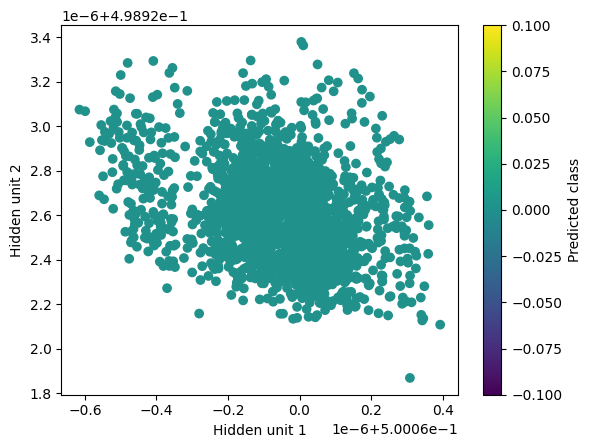

Accuracy 0.0


In [13]:
correct = 0

hidden_1 = []
hidden_2 = []
predictions = []


for examine in range(testing_df.shape[0]):
    first = weight_1 @ np.transpose(np.array([testing_df[examine, :64]])) + bias_1
    first = 1 / (1 + np.exp(-first))

    hidden_1.append(first[0])
    hidden_2.append(first[1])

    second = weight_2 @ first + bias_2
    second = 1 / (1 + np.exp(-second))

    third = weight_3 @ second + bias_3
    third = 1 / (1 + np.exp(-third))

    index = np.argmax(third)
    predictions.append(index)

    real_label = testing_df[examine, 64]
    predicted_label = index - 1

    if real_label == predicted_label:
        correct += 1

#print(hidden_1)
plt.scatter(hidden_1, hidden_2, c=predictions, cmap='viridis')
plt.xlabel('Hidden unit 1')
plt.ylabel('Hidden unit 2')
plt.colorbar().set_label('Predicted class')
plt.show()

accuracy = correct/testing_df.shape[0]
print("Accuracy", accuracy)
